#LSTM Neural Networks for Appliance Consumption Prediction
By Marcella Cornejo


##Data Loading and Initial Exploration
 This dataset contains various features related to energy consumption in a residential building.

You can find the dataset here: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data_path = 'energydata_complete.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


##Data Preprocessing for Machine Learning

* Normalizing Features

* Applying MinMaxScaler
* Scaling the Target Variable


In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())
# This line checks for missing or null values in each column of the DataFrame 'df'.


# Normalize features using MinMaxScaler or StandardScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
# Importing the MinMaxScaler class from the scikit-learn library.
# MinMaxScaler scales features to a specified range, often (0, 1).


scaler = MinMaxScaler(feature_range=(0, 1))
# Creating an instance of MinMaxScaler to scale features to a range between 0 and 1.

scaled_data = scaler.fit_transform(df.drop(columns=['date']))  # Drop the date or non-numeric columns before scaling
# 'fit_transform()' first calculates the scaling parameters and then scales the data accordingly.

# Appliances is the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
# Creating another MinMaxScaler instance for scaling the target variable (Appliances).

df['Appliances_scaled'] = target_scaler.fit_transform(df[['Appliances']])
# Scaling the 'Appliances' column using the target_scaler.

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


##Preparing Time Series Data for LSTM Modeling

*Sequence Creation for Time Series Analysis

*Function for Creating Sequences

*Key Components of the Function:

*Target Variable:

*Sequence Length:

*Process of Sequence Creation:

*Applying the Function:




In [ ]:
# Define the sequence creation function
def create_sequences(features, target, seq_length):
    """
    Creates sequences of data for time series analysis.

    Args:
    features: Array-like, containing the input features.
    target: Array-like, containing the target variable.
    seq_length: Integer, the length of the sequence to be created.

    Returns:
    xs: Array of input sequences.
    ys: Array of target sequences.
    """
    xs = []  # Initialize an empty list for input sequences
    ys = []  # Initialize an empty list for target sequences

    # Iterate over the features array to create sequences
    for i in range(len(features) - seq_length):
        x = features[i:(i + seq_length)]  # Extract a sequence of 'seq_length' from the features
        y = target[i + seq_length]       # Extract the corresponding target value
        xs.append(x)  # Append the sequence to the list of input sequences
        ys.append(y)  # Append the target value to the list of target sequences

    # Convert the lists to numpy arrays and return
    return np.array(xs), np.array(ys)

# Set the length of sequences to be created
seq_length = 5  # Number of time steps to look back

# Create sequences using the scaled data and the scaled 'Appliances' column as the target variable
X, y = create_sequences(scaled_data, df['Appliances_scaled'].values, seq_length)


##Splitting Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Building LSTM model

In [ ]:
# Build the LSTM model
model = Sequential()  # Initialize a Sequential model, a linear stack of neural network layers.

# Add the first LSTM layer to the model
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add the second LSTM layer
model.add(LSTM(units=50))

# Add a Dense layer with 1 unit
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Compiling the model with 'adam' optimizer and 'mean squared error' loss function.

# The Adam optimizer adjusts learning rates during training for better performance.
# Mean squared error measures how far the model's predictions are from the actual values and tries to minimize this difference.

# View the model summary
model.summary()
# This displays a summary of the model, showing each layer, its type, the shape of its output, and the number of neurons or parameters.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             15800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 36051 (140.82 KB)
Trainable params: 36051 (140.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Training the Model


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
444/444 [==============================] - 10s 14ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 2/20
444/444 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 3/20
444/444 [==============================] - 8s 18ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 4/20
444/444 [==============================] - 4s 9ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 5/20
444/444 [==============================] - 4s 9ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 6/20
444/444 [==============================] - 5s 11ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 7/20
444/444 [==============================] - 4s 10ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 8/20
444/444 [==============================] - 4s 9ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 9/20
444/444 [==============================] - 5s 11ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 10/20
444/444 [==============================] - 6s 14ms/step - loss: 0.0036 - val_loss:

##Evaluating the performance of this model

In [ ]:
# Evaluate the model's performance
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


124/124 [==============================] - 1s 8ms/step - loss: 0.0041
Test Loss: 0.004106571897864342


##Making predictions based on the Data and Plotting

124/124 [==============================] - 1s 4ms/step


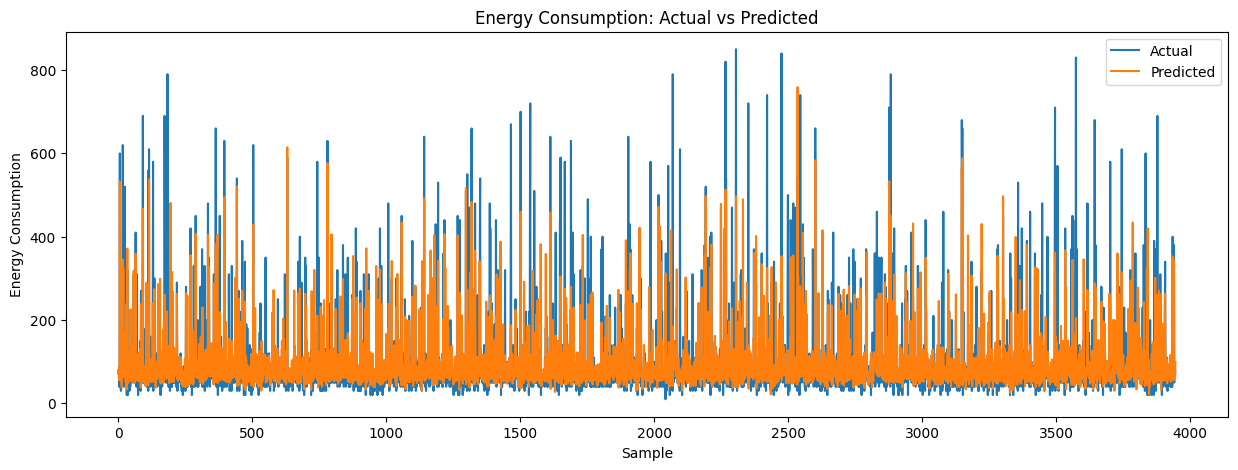

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get the actual energy consumption values
actuals = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predicted = target_scaler.inverse_transform(predictions)

# Plot actual vs predicted energy consumption
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(actuals, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Energy Consumption: Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()
